<a href="https://colab.research.google.com/github/usmankhawar22/Covid-19-Analysis/blob/master/Assignment_01_Data_Visualization_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment # 01: Data Preprocessing and Visualization

#**MUHAMMAD USMAN KHAWAR
#208775
#BESE-8B **

# CS471: Machine Learning
### BESE-8 AB
### Instructors: Prof. Dr. Faisal Shafait, Dr. Muhammad Muneeb Ullah
#### Due Date: March 18, 2020

### Introduction

The Novel Coronavirus (COVID19) which causes respiratory illnesss was first detected in Wuhan, China. Since the disease is contagious, it has spread all over the world due to the high number of tourism and business visits to / from China. As you all are very well aware, COVID19 has been labelled as a global pandemic now by World Health Organization. Countries such as Italy, China, Qatar, USA, Saudi Arabia, etc, have cancelled most of the flights and a lockdown notice has been issued in Italy to avoid further wide-spread of the virus. 
Scientists all over the world are trying to drive insights from the datasets to come up with a possible prediction which will help with early diagnosis of COVID-19, estimating the spread, and the virus frequency and duration. 
Johns Hopkins University has made an excellent dashboard using the affected cases data. The dataset is made available at Kaggle and can be downloaded for the purpose of research.
For this assignment, we will use the Kaggle COVID-19 dataset (Download here: <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" title="DATASET">DATASET</a>) and will try to learn some insights using the power of Machine Learning.
The Johns Hopkins University's web based dashboard can be accessed here:
<a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6" title="Web Dashboard">Web Dashboard</a>

#### Question # 01

As you must have noticed, there are 6 files in the data you have downloaded from Kaggle.
For this question, we will use the main file `covid_19_data.csv`.
The steps to follow are given:
1. Read the data file and examine the features
2. Since the dataset is a bit sparse, clean the dataset by dropping rows which have missing points.
3. Print the initial 10 rows of the data.

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("covid_19_data.csv")
df


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [0]:
missing_data = df.isnull()
missing_data.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [0]:
#data observation 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SNo
False    6722
Name: SNo, dtype: int64

ObservationDate
False    6722
Name: ObservationDate, dtype: int64

Province/State
False    3956
True     2766
Name: Province/State, dtype: int64

Country/Region
False    6722
Name: Country/Region, dtype: int64

Last Update
False    6722
Name: Last Update, dtype: int64

Confirmed
False    6722
Name: Confirmed, dtype: int64

Deaths
False    6722
Name: Deaths, dtype: int64

Recovered
False    6722
Name: Recovered, dtype: int64



In [0]:
#dropping sparse data
 df2=df          #we cant drop rows for iran in later question#3
 df1=df.dropna()   #for question 2
 df2['Country/Region'].unique()
 

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

#### Question # 02

1. Rank the countries in the dataset in descending order according to the number of deaths.
2. Figure out the most affected provinces/states in top 3 countries with most number of Deaths.
3. Repeat the first two steps for Recovered and Confirmed cases as well.
4. Plot a bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

In [0]:
df1.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [0]:
#getting all the countries
couuntries=df1['Country/Region'].unique()
couuntries

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Canada',
       'Australia', 'Germany', 'Others', 'Israel', 'Lebanon', 'Iraq',
       'Austria', 'France', 'UK', 'Denmark', 'Netherlands'], dtype=object)


here I am group sorting by the highest number of deaths by countries and their provinces and latest value of dates



In [0]:
print("Countries ranked upon death rate")
x=df1.groupby(['Country/Region'])
for c in couuntries:
  
  entity= x.get_group(c)
  sum=entity['Deaths'].sum()
  print(c, sum)

Countries ranked upon death rate
Mainland China 103022.0
Hong Kong 90.0
Macau 0.0
Taiwan 24.0
US 691.0
Canada 24.0
Australia 51.0
Germany 0.0
Others 151.0
Israel 0.0
Lebanon 0.0
Iraq 0.0
Austria 0.0
France 801.0
UK 250.0
Denmark 14.0
Netherlands 125.0


In [0]:
def Prov(country, df,parameter):
  df=df.groupby(['Country/Region']).get_group(country).groupby(['Province/State'])
  #china=china.sort_values('Deaths', ascending=False)
  #china=china.groupby(['Province/State'])
  values=df.groups.keys()
  prov=dict()
  for x in values:
    latest = df.get_group(x)['ObservationDate'].max()
  
    sum=df.get_group(x).groupby('ObservationDate').get_group(latest)[parameter].sum()
    prov[x]=sum
    #print(dea)
  prov= (sorted(prov.items(), key=lambda x: x[1], reverse=True)[:10])
  return(prov)


def plot(coun):
  coun=dict(coun)
  import matplotlib.pyplot as plt;
  plt.xlabel('Provinces')
  plt.ylabel('Total')
  plt.title('top 10 provinces')
  plt.bar(range(len(coun)),list(coun.values()), align='center')
  plt.xticks(range(len(coun)),list(coun.keys()))
  plt.xticks(rotation=90)
  plt.show()

#for question 4
# def plotline(coun):
#   coun=dict(coun)
#   import matplotlib.pyplot as plt;

#   plt.plot(range(len(coun)),list(coun.values()), align='center')
#   plt.xticks(range(len(coun)),list(coun.keys()))
#   plt.xticks(rotation=90)
#   plt.show()
  




#creating functions of above for the repitition steps


In [0]:


def rank(dataframe,couuntries,parameter):
  fram=dataframe.sort_values(parameter, ascending=False).drop_duplicates(['Country/Region','Province/State'])
  x=fram.groupby(['Country/Region'])
  records = dict()
  print('Countries Ranked upon', parameter)
  for c in couuntries:
    entity= x.get_group(c)
    sum=entity[parameter].sum()
    records[c] = sum
  sortedranks = sorted(records.items(), key=lambda x: x[1], reverse=True)
  return sortedranks

In [0]:
deathsC=rank(df1,couuntries,'Deaths')
deathsC


Countries Ranked upon Deaths


[('Mainland China', 3237.0),
 ('France', 148.0),
 ('US', 141.0),
 ('UK', 80.0),
 ('Netherlands', 58.0),
 ('Canada', 8.0),
 ('Others', 7.0),
 ('Australia', 6.0),
 ('Hong Kong', 4.0),
 ('Denmark', 4.0),
 ('Taiwan', 1.0),
 ('Macau', 0.0),
 ('Germany', 0.0),
 ('Israel', 0.0),
 ('Lebanon', 0.0),
 ('Iraq', 0.0),
 ('Austria', 0.0)]

In [0]:
ConfirmedC=rank(df1,couuntries,'Confirmed')
ConfirmedC

Countries Ranked upon Confirmed


[('Mainland China', 80907.0),
 ('France', 9080.0),
 ('US', 8546.0),
 ('UK', 3098.0),
 ('Netherlands', 2056.0),
 ('Denmark', 1115.0),
 ('Others', 773.0),
 ('Canada', 694.0),
 ('Australia', 576.0),
 ('Hong Kong', 181.0),
 ('Taiwan', 47.0),
 ('Macau', 15.0),
 ('Germany', 5.0),
 ('Austria', 2.0),
 ('Israel', 1.0),
 ('Lebanon', 1.0),
 ('Iraq', 0.0)]

In [0]:
RecoveredC=rank(df1,couuntries,'Recovered')
RecoveredC

Countries Ranked upon Recovered


[('Mainland China', 69653.0),
 ('Others', 325.0),
 ('US', 137.0),
 ('Hong Kong', 92.0),
 ('UK', 85.0),
 ('Australia', 23.0),
 ('Taiwan', 17.0),
 ('Canada', 13.0),
 ('France', 12.0),
 ('Macau', 10.0),
 ('Netherlands', 2.0),
 ('Denmark', 1.0),
 ('Germany', 0.0),
 ('Israel', 0.0),
 ('Lebanon', 0.0),
 ('Iraq', 0.0),
 ('Austria', 0.0)]

# function for top province


In [0]:
def topProvince(dataframe,countries,parameters):
  df2=df.sort_values(parameters, ascending=False).drop_duplicates(['Country/Region','Province/State'])
  max=df2.groupby(['Country/Region'])
  for c in countries:
    top=max.get_group(c).iloc[0]
    print(top['Country/Region'],top['Province/State'], top[parameters])

#the most affected provinces/states in top 3 countries with most number of Deaths.

In [0]:
topCountries = [c[0] for c in deathsC[:3]]
#rankProvinces(topCountries, data, 'Deaths')
#topCountries

topProvince(df,topCountries,'Deaths')

Mainland China Hubei 3122.0
France France 148.0
US Washington 55.0


#the most affected provinces/states in top 3 countries with most number of Recovery.

In [0]:
topCountries = [c[0] for c in RecoveredC[:3]]
#rankProvinces(topCountries, data, 'Deaths')
#topCountries

topProvince(df,topCountries,'Recovered')

Mainland China Hubei 56927.0
Others Diamond Princess cruise ship 325.0
US US 106.0


#the most affected provinces/states in top 3 countries with most number of Recovery.

In [0]:
topCountries = [c[0] for c in ConfirmedC[:3]]
#rankProvinces(topCountries, data, 'Deaths')
#topCountries

topProvince(df,topCountries,'Confirmed')

Mainland China Hubei 67800.0
France France 9043.0
US New York 2495.0


In [0]:
df=df.get_group().groupby('ObservationDate')

#bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

#For Death

for China


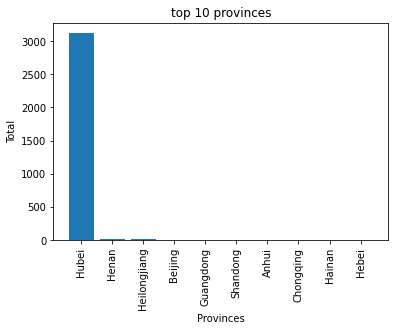

For US


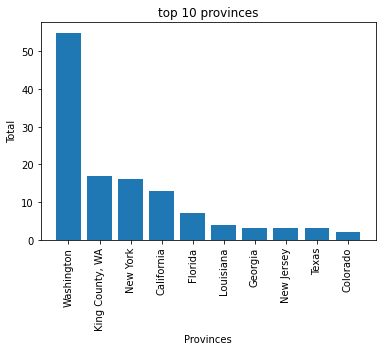

In [0]:
chin=Prov('Mainland China',df1,'Deaths')
print('for China')
plot(chin)
 

US=Prov('US',df1,'Deaths')
print('For US')
plot(US)

# #chin=dict(chin)

# import matplotlib.pyplot as plt;
# chin=dict(chin)
# plt.plot(list(chin.keys()), list(chin.values()), marker='', color='red', linewidth=2,label="death cases")
# plt.xticks(rotation=90)


# plt.show()










#For Recovery

for China


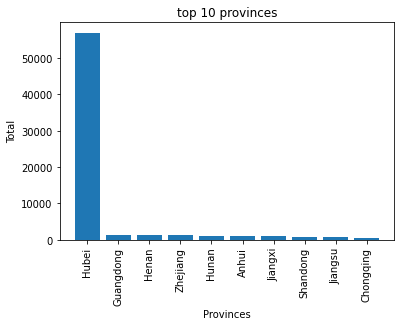

For US


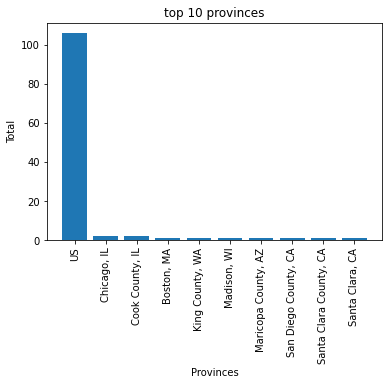

In [0]:
china=Prov('Mainland China',df1,'Recovered')
print('for China')
plot(china)
 

USR=Prov('US',df1,'Recovered')
print('For US')
plot(USR)

#### Question # 03

Since we have dates in the data, let's quantify out how the virus has spread over time and which areas are most affected by the virus. This will help us figure out if the situation is getting any better over time or not.

1. Plot the confirmed, deaths and recovered cases as line graphs with dates for US, Iran and China each.
2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?
3. Work out the death rate due to COVID-19 in these three countries.
4. By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran and China) and then answer the question?

we extract the date wise 

In [0]:
def graphCases(dataframe, country, feature):
  df=dataframe.get_group(country).groupby('ObservationDate')
  #dateGrouped = data.get_group(country).groupby('ObservationDate')

  dates=df.groups.keys()
  values = dict()
  for date in dates:
    values[date] = df.get_group(date)[feature].sum()
  return values


#plotting confirmed


No handles with labels found to put in legend.


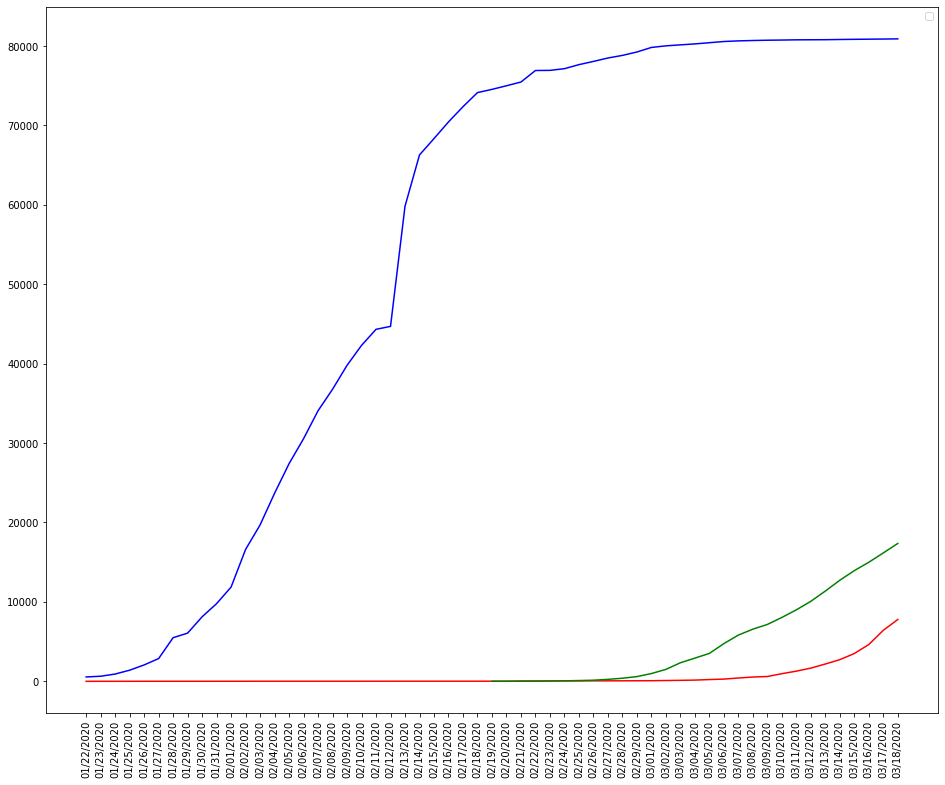

In [0]:
#df2=df2.groupby('Country/Region')
ChinaC = graphCases(df2, 'Mainland China', 'Confirmed')
USC = graphCases(df2, 'US', 'Confirmed')
IranC = graphCases(df2, 'Iran', 'Confirmed')


import matplotlib.pyplot as plt
fig= plt.figure(figsize=(16,13))
plt.xticks(rotation=90)
plt.plot(list(USC), list(USC.values()),  color='red')
plt.plot(list(ChinaC), list(ChinaC.values()), color='blue')

plt.plot(list(IranC), list(IranC.values()), color='green')

plt.legend()
plt.show()



recovered cases

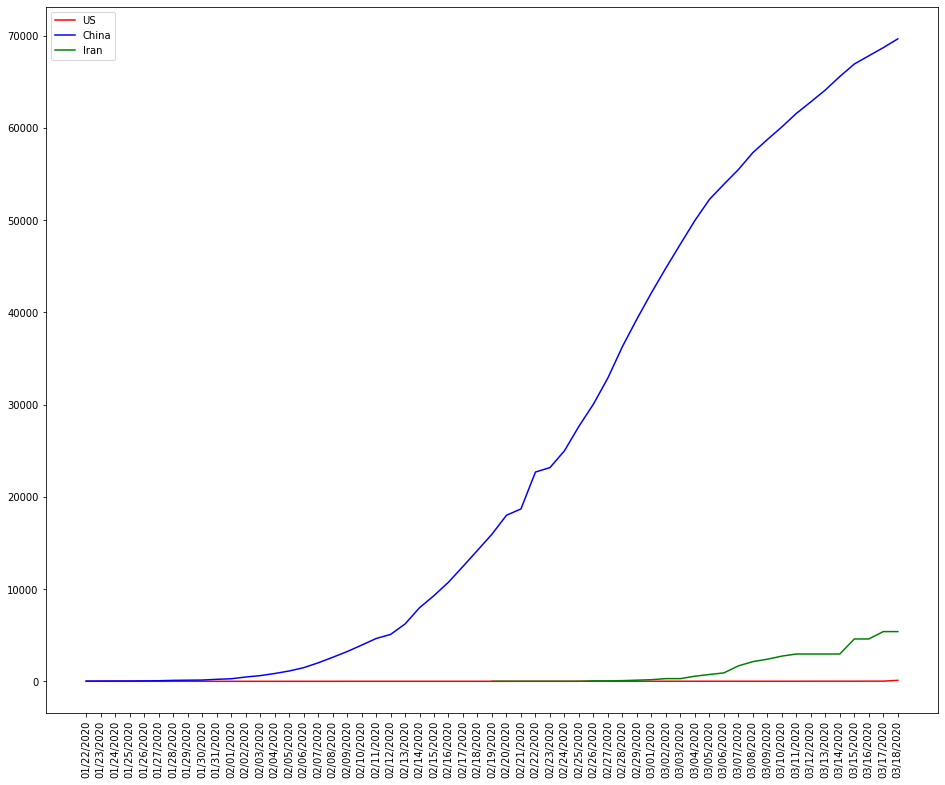

In [0]:
ChinaR = graphCases(df2, 'Mainland China', 'Recovered')
USR = graphCases(df2, 'US', 'Recovered')
IranR = graphCases(df2, 'Iran', 'Recovered')


import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,13))
plt.plot(list(USR), list(USR.values()),  color='red', label='US')
plt.plot(list(ChinaR), list(ChinaR.values()), color='blue',label='China')
plt.xticks(rotation=90)

plt.plot(list(IranR), list(IranR.values()), color='green',label='Iran')

plt.legend()
plt.show()

Deaths

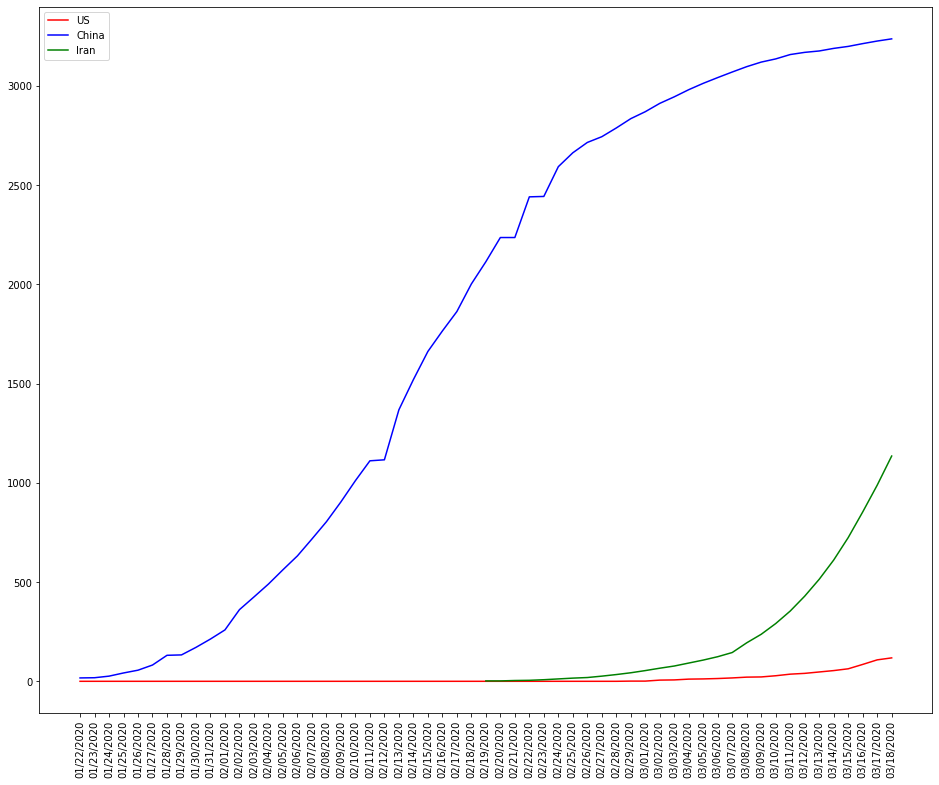

In [0]:
ChinaD = graphCases(df2, 'Mainland China', 'Deaths')
USD = graphCases(df2, 'US', 'Deaths')
IranD = graphCases(df2, 'Iran', 'Deaths')


import matplotlib.pyplot as plt
fig= plt.figure(figsize=(16,13))
plt.plot(list(USD), list(USD.values()),  color='red', label='US')
plt.plot(list(ChinaD), list(ChinaD.values()), color='blue',label='China')

plt.plot(list(IranD), list(IranD.values()), color='green',label='Iran')
plt.xticks(rotation=90)

plt.legend()
plt.show()

#china has seen a surge in confirmed, while iran has seen it in death cases

**bold Work out the death rate due to COVID-19 in these three countries**
# no of deaths can be interpreted in various days.here I will do with total deaths/ no of days

In [0]:
xf=df2.get_group('Mainland China').groupby('ObservationDate')
#xf.head()
xf['ObservationDate'].max()

ObservationDate
01/22/2020    01/22/2020
01/23/2020    01/23/2020
01/24/2020    01/24/2020
01/25/2020    01/25/2020
01/26/2020    01/26/2020
01/27/2020    01/27/2020
01/28/2020    01/28/2020
01/29/2020    01/29/2020
01/30/2020    01/30/2020
01/31/2020    01/31/2020
02/01/2020    02/01/2020
02/02/2020    02/02/2020
02/03/2020    02/03/2020
02/04/2020    02/04/2020
02/05/2020    02/05/2020
02/06/2020    02/06/2020
02/07/2020    02/07/2020
02/08/2020    02/08/2020
02/09/2020    02/09/2020
02/10/2020    02/10/2020
02/11/2020    02/11/2020
02/12/2020    02/12/2020
02/13/2020    02/13/2020
02/14/2020    02/14/2020
02/15/2020    02/15/2020
02/16/2020    02/16/2020
02/17/2020    02/17/2020
02/18/2020    02/18/2020
02/19/2020    02/19/2020
02/20/2020    02/20/2020
02/21/2020    02/21/2020
02/22/2020    02/22/2020
02/23/2020    02/23/2020
02/24/2020    02/24/2020
02/25/2020    02/25/2020
02/26/2020    02/26/2020
02/27/2020    02/27/2020
02/28/2020    02/28/2020
02/29/2020    02/29/2020
03/01/202

In [0]:
def Rate(dataframe, country, parameter):
  countrySum=dataframe.get_group(country).groupby('ObservationDate')
  totaldays=len(countrySum.groups.keys())
  latestdays=dataframe.get_group(country)['ObservationDate'].max()
  total=countrySum.get_group(latestdays)[parameter].sum()
  
  rate= total/totaldays
  print("Rate of",country,"is", rate)

In [0]:
print("Death RATES")
Rate(df2,"Mainland China",'Deaths')
Rate(df2,"Iran",'Deaths')
Rate(df2,"US",'Deaths')

Death RATES
Death Rate of Mainland China is 56.78947368421053
Death Rate of Iran is 39.13793103448276
Death Rate of US is 2.0701754385964914


In [0]:
print("Recovery RATES")
Rate(df2,"Mainland China",'Recovered')
Rate(df2,"Iran",'Recovered')
Rate(df2,"US",'Recovered')

Recovery RATES
Rate of Mainland China is 1221.982456140351
Rate of Iran is 185.82758620689654
Rate of US is 1.8596491228070176


#### Question # 04

In this question, we will look at another data file namely `time_series_covid_19_deaths.csv`.
In this file, time series data of death occurred due to COVID-19 in countries/states/provinces is given.

1. Read the file and examine the features.
2. Clean the dataset by dropping missing rows with data points.
3. Since you already have information for States/Provinces in US, and China with most deaths, you can use those States/Provinces and plot the number of deaths against each of the top 5 states in both China and US.

In [0]:


dataset = pd.read_csv('time_series_covid_19_deaths.csv')
dataset.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20'],
      dtype='object')

In [0]:
dataset


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# replace all NA's with 0
dataset.fillna(0)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,0,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22
2,0,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
438,0,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
439,0,Suriname,3.9193,-56.0278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Plotting


plot the number of deaths against each of the top 5 states in both China and US.

In [0]:

def pltTop(coun):

  coun=dict(coun)
  
  plt.plot(list(coun.keys()), list(coun.values()), marker='', color='red', linewidth=2,label="death cases")
  plt.xticks(rotation=90)
  plt.show()



  #chin=dict(chin)

# import matplotlib.pyplot as plt;
# chin=dict(chin)
# plt.plot(list(chin.keys()), list(chin.values()), marker='', color='red', linewidth=2,label="death cases")
# 


# plt.show()






For China


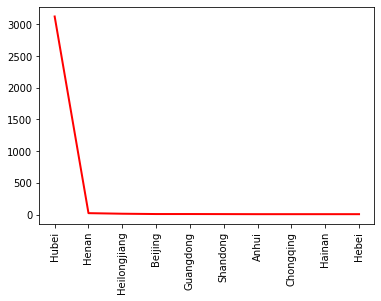

For US


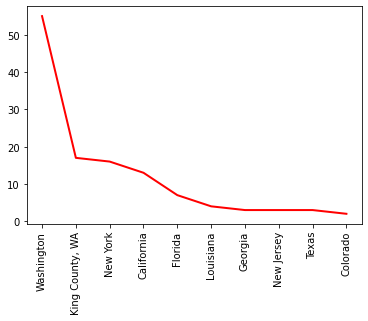

In [0]:
print('For China')
pltTop(chin)
print('For US')
pltTop(US)

#**note the above data dont make much of a sense, I am now plotting the growth of death curve wrt China and US**

In [0]:
def curve(provi, df):
  df=df.groupby(['Province/State']).get_group(provi)
  crv=df.groupby(['ObservationDate'])

  values=crv.groups.keys()
  prov=dict()
  sum=0
  for x in values:
    
  
    sum=crv.get_group(x)['Deaths'].sum()
    prov[x]=sum
  return(prov)

#for China

In [0]:
# china=df.groupby(['Country/Region']).get_group('Mainland China')
# # chinaProvinces = ['Hubei', 'Henan', 'Heilongjiang', 'Beijing', 'Guangdong']
# dfx=china.groupby(['Province/State']).get_group('Hubei')

# dfx=dfx.groupby(['ObservationDate'])
# # dfx
# values=dfx.groups.keys()
# # values
# prov=dict()
# for x in values:
#   sum=dfx.get_group(x)['Deaths'].sum()
#   prov[x]=sum
# # print( prov)
# print(prov)
# # chin=dict(prov)
# # plt.plot(list(chin.keys()), list(chin.values()), marker='', color='red', linewidth=2)
# # #plt.xticks(rotation=90)
# # #   # prov= (sorted(prov.items(), key=lambda x: x[1], reverse=True)[:10])
# # #   # return(prov)



#curve('Hubei',china)

Death Curve for Hubei
Death Curve for Henan
Death Curve for Heilongjiang
Death Curve for Beijing
Death Curve for Guangdong


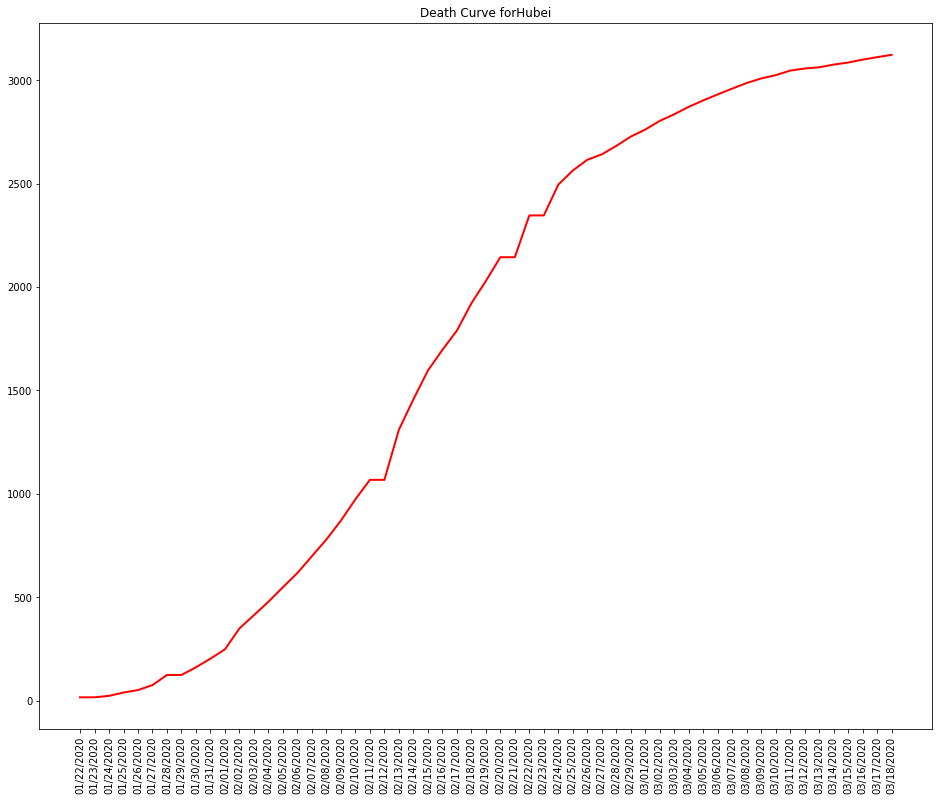

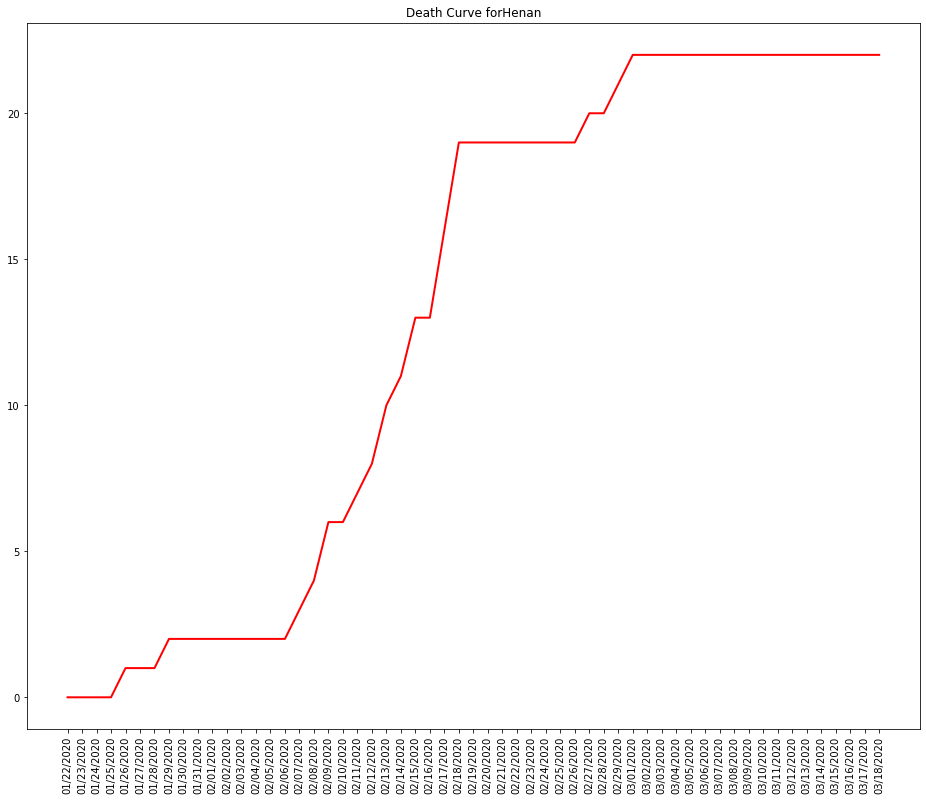

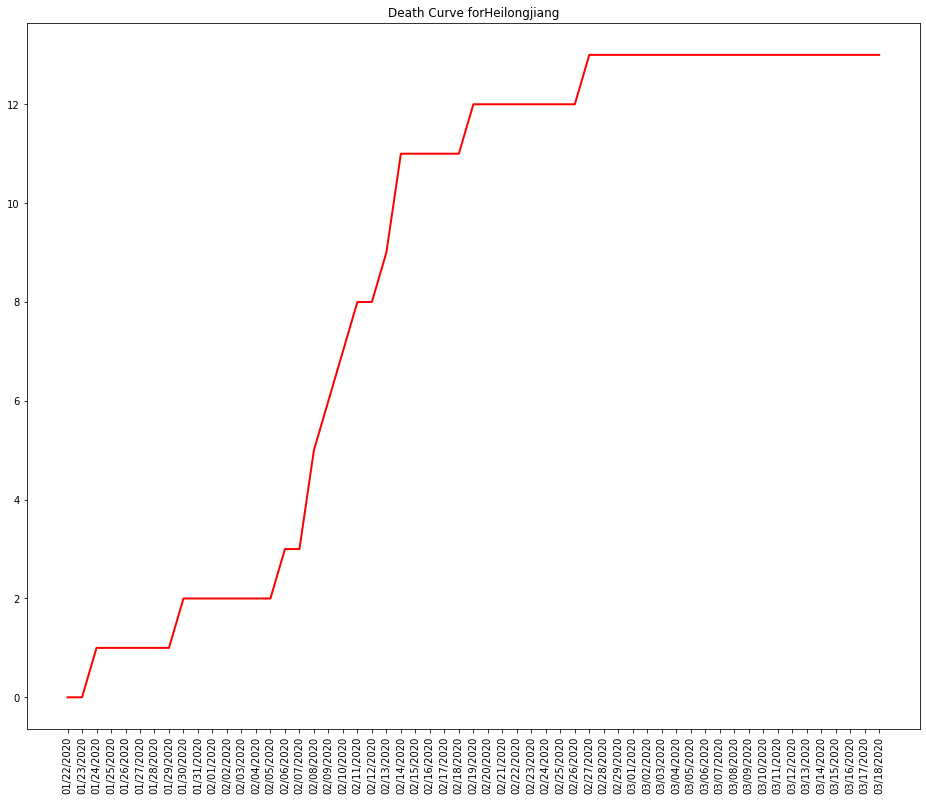

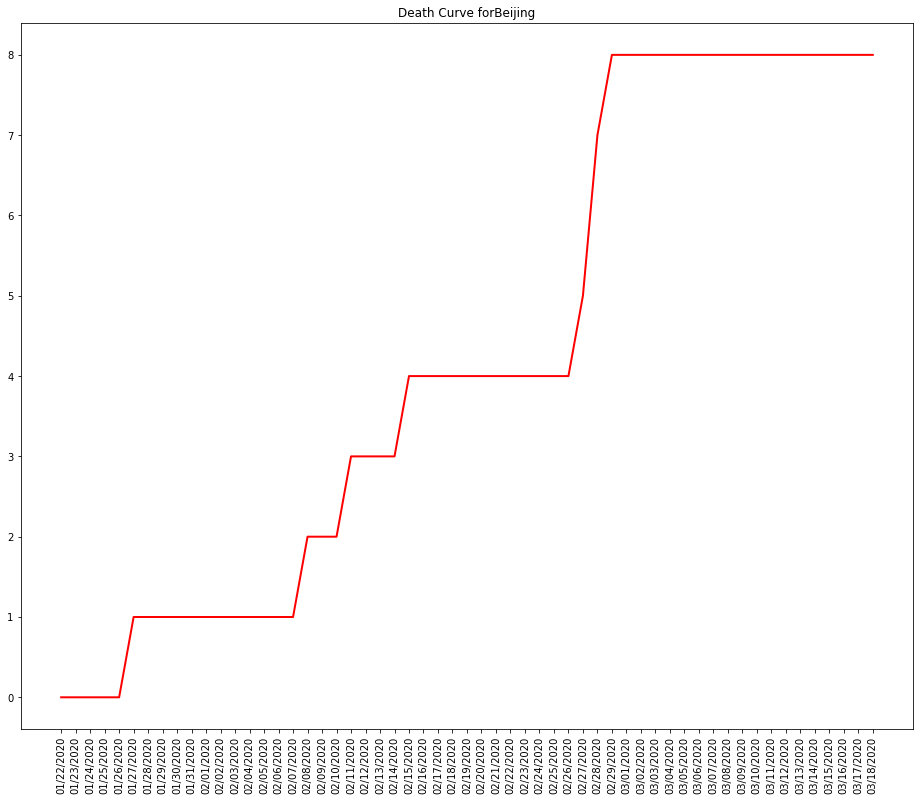

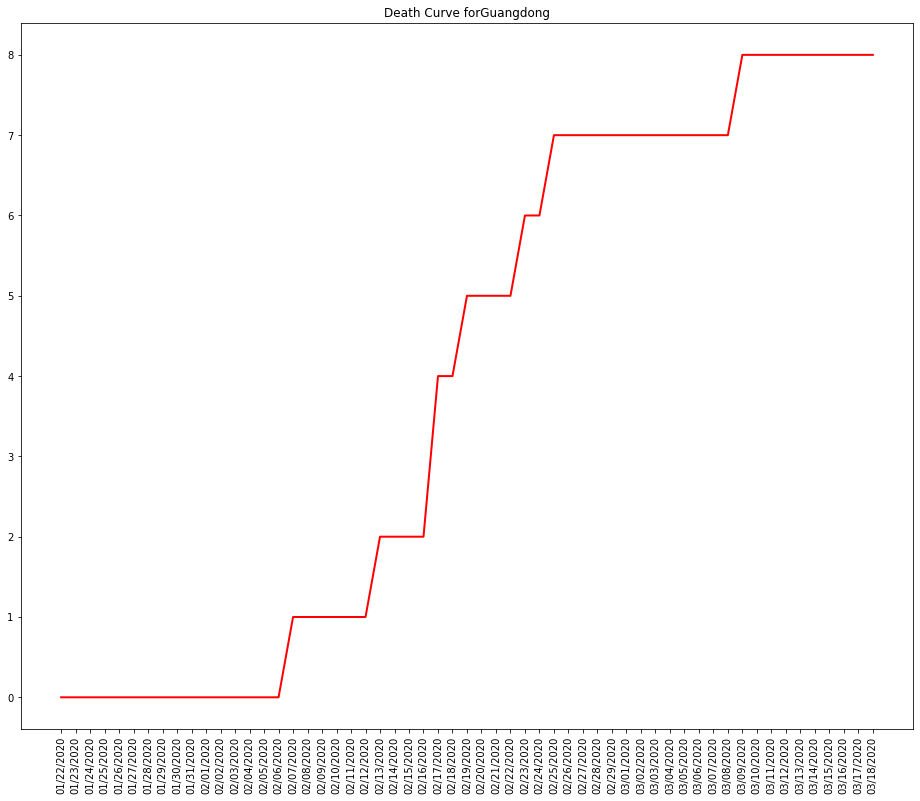

In [0]:

chinaProvinces = ['Hubei', 'Henan', 'Heilongjiang', 'Beijing', 'Guangdong']
for c in chinaProvinces:
  provC=curve(c,china) 
  print('Death Curve for',c)
  fig= plt.figure(figsize=(16,13))
  plt.xticks(rotation=90)
  plt.title('Death Curve for'+c)
  plt.plot(list(provC.keys()), list(provC.values()),color='red', linewidth=2)
  
  

  


For US

Death Curve for Washington
Death Curve for California
Death Curve for Florida
Death Curve for New York


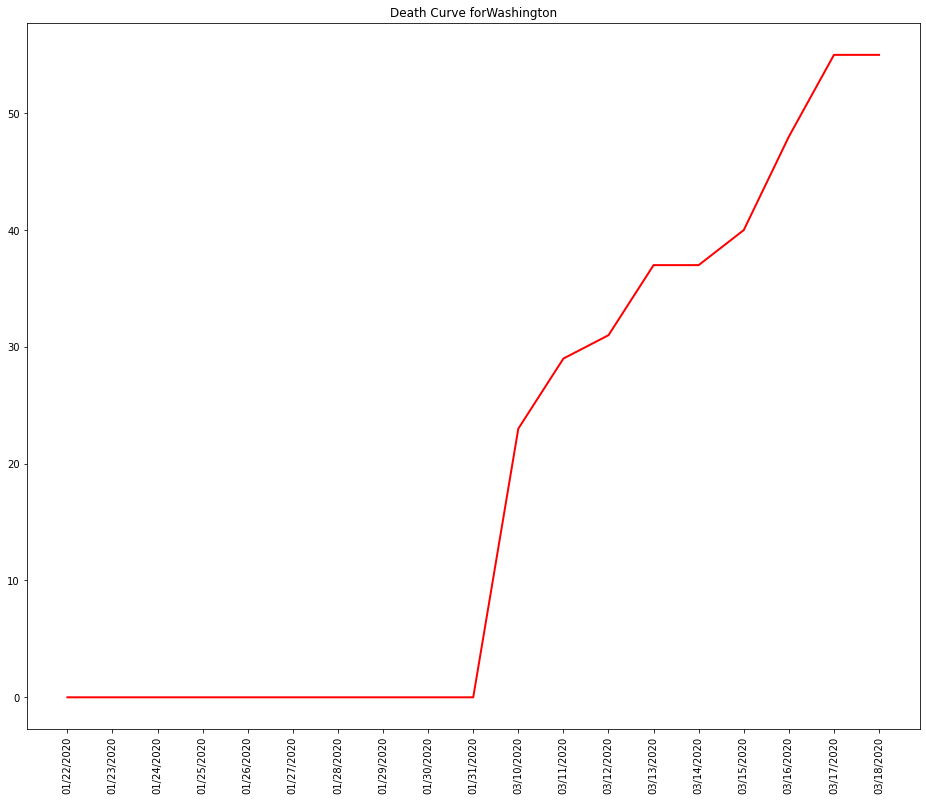

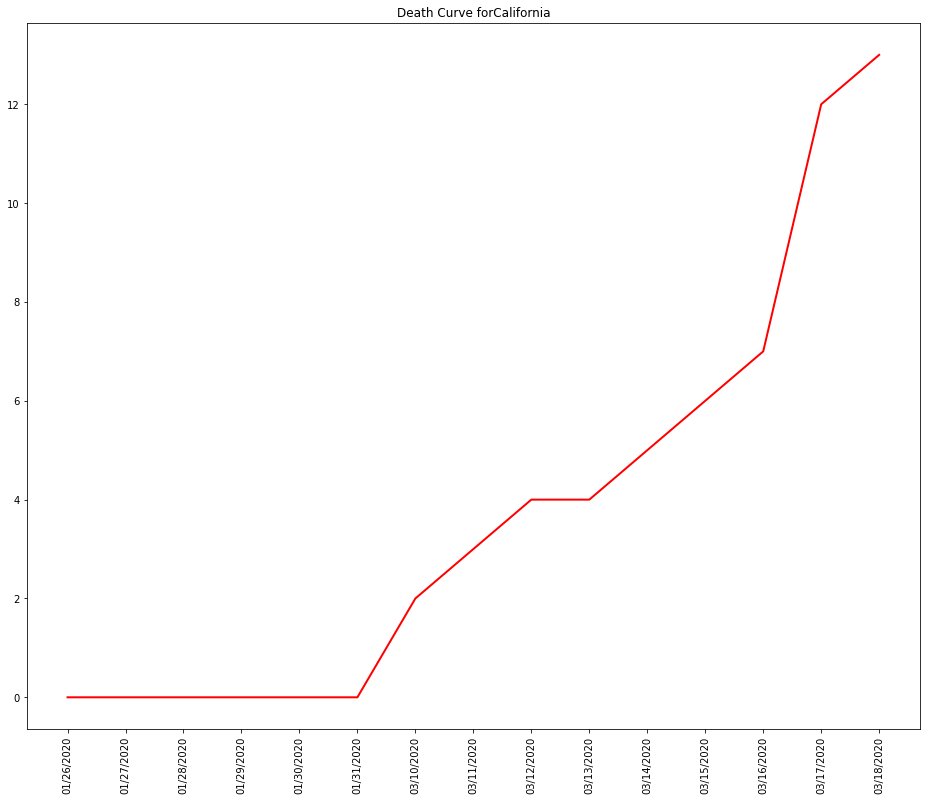

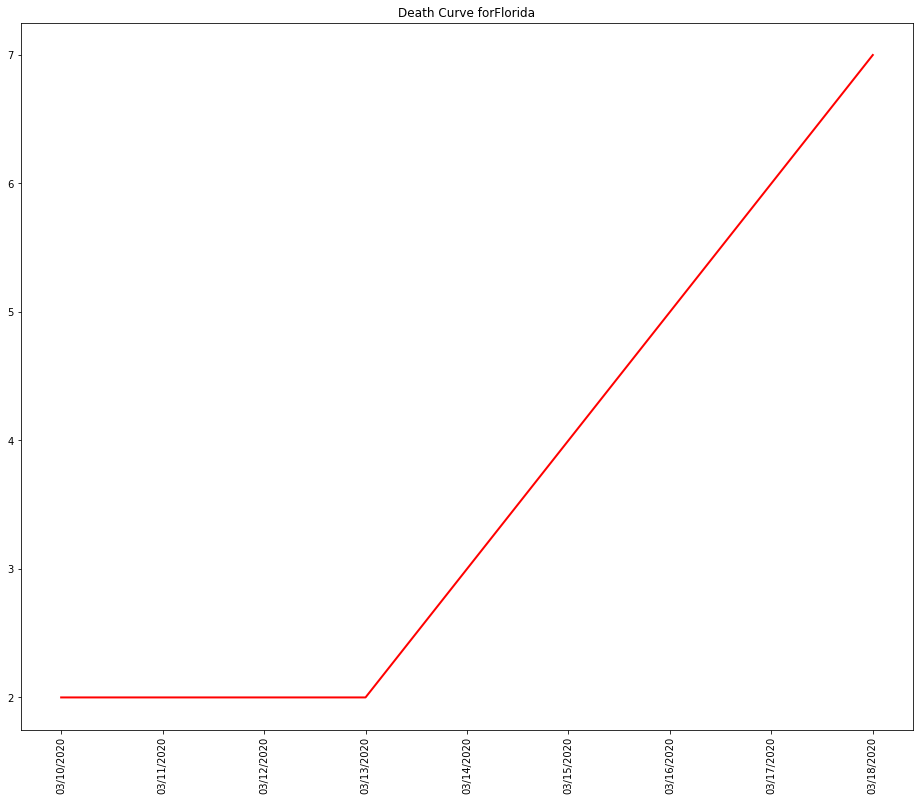

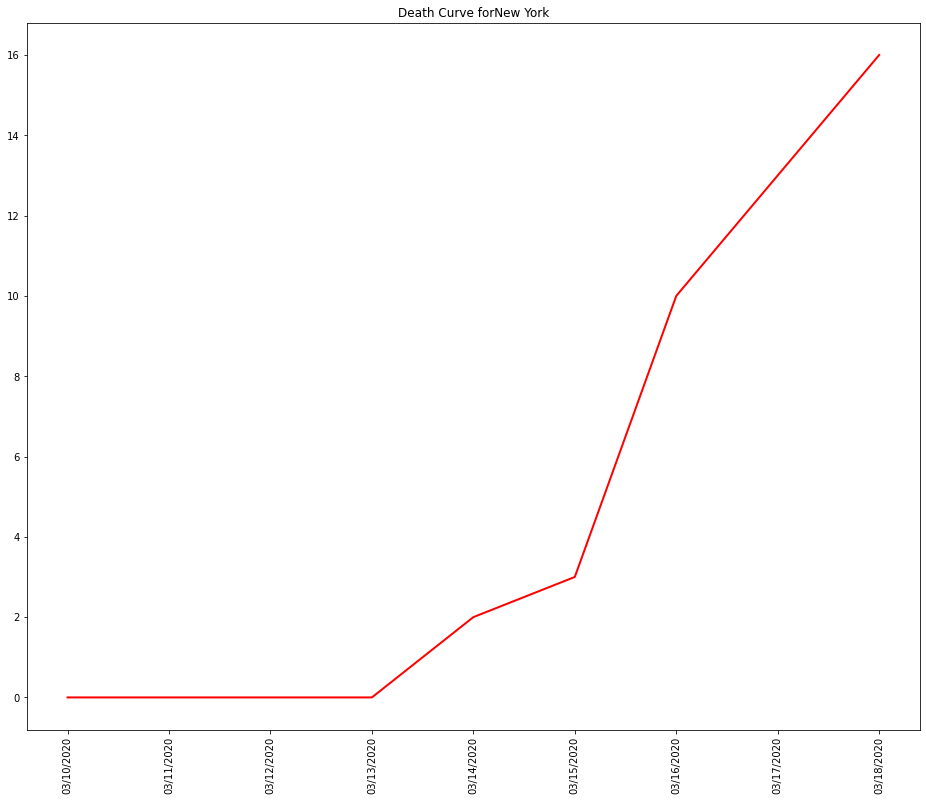

In [0]:
UsP = ['Washington','California', 'Florida', 'New York']
US=df.groupby(['Country/Region']).get_group('US')
for c in UsP:
  provC=curve(c,US) 
  print('Death Curve for',c)
  fig= plt.figure(figsize=(16,13))
  plt.xticks(rotation=90)
  plt.title('Death Curve for'+c)
  plt.plot(list(provC.keys()), list(provC.values()),color='red', linewidth=2)
  
  

#### Question # 05

This aspect is interesting since we would get to work with Geographical Plots. You have the latitude and longitude data from the `time_series_covid_19_deaths.csv` data file. You will use that for this question.

We will use BaseMap library to plot the latitude and longitude points on the world map.
You can download BaseMap by running the following command in your terminal/command line prompt: 
```
pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
```

1. Once you have it installed, load up a basic world map and plot the values.
2. By visually examining, answer in which countries, the points scatter the most?

For reference and working directions with Basemap, you may take help from this video tutorial: <a href="https://www.youtube.com/watch?time_continue=114&v=XiZbrii49pI&feature=emb_title" BASEMAP >BASEMAP TUTORIAL</a>

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (143 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

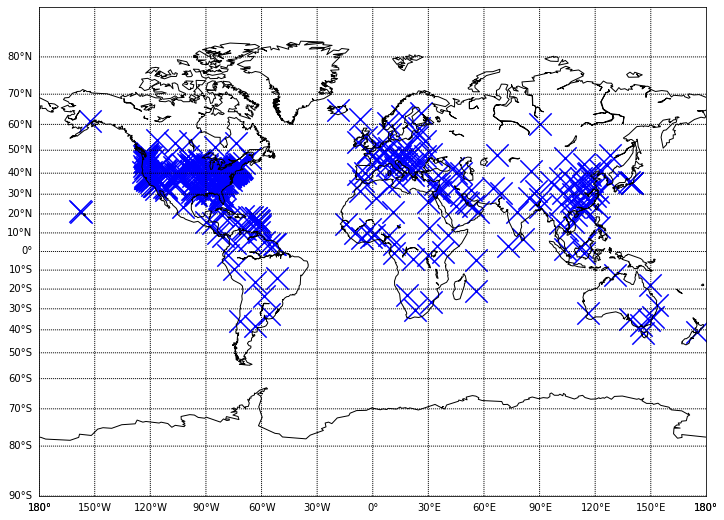

In [0]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap

dataset = pd.read_csv('time_series_covid_19_deaths.csv')


fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

latitude = dataset['Lat'].tolist()
longitude = dataset['Long'].tolist()

m.scatter(longitude,latitude,latlon=True, s=500, c='blue', marker='x', alpha=1)



plt.show()

#### Question # 06

For this question, we will use the `COVID19_open_line_list.csv` file. 

1. Read the data file and examine the features
2. We will be working with these feature columns: `age, sex, symptoms, city, province, lives_in_Wuhan, and travel_history_location`.
3. Since these are textual values, you need to encode them to integers (maintain an encoding dictionary as well).
    * For example in `symptoms` column, you might assign fever -> 1, pneumonia -> 2, headache -> 3, etc.
    * There are several multiple symptoms as well for a single row, for those you can just sum the assigned integers. For example a row might list these symptons: fever, headache, since fever -> 1 and headache -> 3, you can replace fever, headache with 1+3 = 4 and so on. Start the integer encoding from 1 so that when summing the numbers, you donot get the same number back (e.g. 0+3 = 3).
    * You can do the same for other columns, just to avoid ambiguity, you can encode each column differently. 
    * For example, for the `symptoms` column, you starting assigning numbers from 1, let's say there were 4 symptoms, so the numbers would range from 1 - 4. For the next column, you can use numbers from 5 and so on. You are free to encode as you want. 
    * For ease, you can also use sklearn's LabelEncoder.
4. Once you have integer coded the entire dataset (7 columns), you can compute the correlation between city (let city column be `y` for this case) and every other column.
5. Pick the most 2 correlated fields (using the absolute value of correlations) and make `X`.
6. Use MinMaxScaler to scale X. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately.
7. Print the head (5 rows) and tail (5 rows) of this dataframe.

In [0]:
df=pd.read_csv('COVID19_open_line_list.csv')

In [0]:
df.describe()

,ID,wuhan(0)_not_wuhan(1),latitude,longitude,chronic_disease_binary,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
count,13173.000000,13170.0,13147.000000,13147.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6769.250436,1.0,31.994650,110.495353,0.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3920.886020,0.0,7.536335,27.985144,0.460889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.0,-37.813600,-124.953070,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3351.000000,1.0,27.905380,111.729600,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6865.000000,1.0,31.759410,115.441800,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10180.000000,1.0,35.781340,120.440400,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,13479.000000,1.0,69.649468,153.400000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [0]:
df=df[['age', 'sex', 'symptoms', 'city', 'province', 'lives_in_Wuhan','travel_history_location']]
df

,age,sex,symptoms,city,province,lives_in_Wuhan,travel_history_location
0,30,male,NaN,"Chaohu City, Hefei City",Anhui,yes,Wuhan
1,47,male,NaN,"Baohe District, Hefei City",Anhui,no,"Luzhou Hunan, via Wuhan"
2,49,male,NaN,"High-Tech Zone, Hefei City",Anhui,no,"Yinzhou Hunan, via Wuhan"
3,47,female,NaN,"High-Tech Zone, Hefei City",Anhui,no,NaN
4,50,female,NaN,"Feidong County, Hefei City",Anhui,no,Wuhan
...,...,...,...,...,...,...,...
14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df=df.fillna('NA')


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column in df.columns:
  le.fit(df[column])
  df[column] = le.transform(df[column])


In [0]:
le.inverse_transform

<bound method LabelEncoder.inverse_transform of LabelEncoder()>

In [0]:
for col in list(df.columns):
  print('Absolute value of city with', col, abs(df['city'].corr(df[col])))

Absolute value of correlatioin between city and age 0.06010611985495587
Absolute value of correlatioin between city and sex 0.08383836348201464
Absolute value of correlatioin between city and symptoms 0.047428758803770614
Absolute value of correlatioin between city and city 1.0
Absolute value of correlatioin between city and province 0.14296158283723115
Absolute value of correlatioin between city and lives_in_Wuhan 0.05541514153675362
Absolute value of correlatioin between city and travel_history_location 0.01997107127656418


In [0]:
df.corr()

,age,sex,symptoms,city,province,lives_in_Wuhan,travel_history_location
age,1.000000,-0.741257,-0.420462,0.060106,-0.011341,-0.405191,-0.256712
sex,-0.741257,1.000000,0.483601,-0.083838,0.022234,0.453334,0.264579
symptoms,-0.420462,0.483601,1.000000,-0.047429,0.011460,0.358518,0.210328
city,0.060106,-0.083838,-0.047429,1.000000,0.142962,-0.055415,-0.019971
province,-0.011341,0.022234,0.011460,0.142962,1.000000,0.015961,0.027648
lives_in_Wuhan,-0.405191,0.453334,0.358518,-0.055415,0.015961,1.000000,0.411611
travel_history_location,-0.256712,0.264579,0.210328,-0.019971,0.027648,0.411611,1.000000


age and sex are related by a factor of 0.74

In [0]:
X = df[['age','sex']]
X

,age,sex
0,39,5
1,62,5
2,64,5
3,62,4
4,66,4
...,...,...
14121,116,3
14122,116,3
14123,116,3
14124,116,3


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
#scaler.transform(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
X.columns=['age','sex']
X

,age,sex
0,0.336207,1.0
1,0.534483,1.0
2,0.551724,1.0
3,0.534483,0.8
4,0.568966,0.8
...,...,...
14121,1.000000,0.6
14122,1.000000,0.6
14123,1.000000,0.6
14124,1.000000,0.6


In [0]:
X.head()

,age,sex
0,0.336207,1.0
1,0.534483,1.0
2,0.551724,1.0
3,0.534483,0.8
4,0.568966,0.8


In [0]:
X.tail()

,age,sex
14121,1.0,0.6
14122,1.0,0.6
14123,1.0,0.6
14124,1.0,0.6
14125,1.0,0.6
